# Analysing Missing Values and Outliers

This Jupyter Notebook covers the solution implementation of the third milestone of 3-Project series on End to End ML for Binary Classification.



## Data 

We are using the [Rainfall prediction dataset from Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) which cotains daily weather observations from numerous Austrailian weather stations.


## Problem Statement
We aim to answer a very simple question - Whether it will rain tomorrow in Australia or not. 

## Importing Libraries

In [151]:
##importing libraries
import numpy as np  #for algebraic operations on arrays
import pandas as pd  #for data exploration and manipulation


##plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [152]:
data_path = './data/weatherAUS.csv'

##loading the dataset into a dataframe
df = pd.read_csv(data_path)

##preview the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Exploratory Data Analysis

In [153]:
##to check the dimensions of the dataset
df.shape

(142193, 24)

In [154]:
##transposing the data to get a good understanding
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


There are a lot of variables/features here but the most interesting feature is the last column `RainTomorrow`. This is the target variable for our ML model which we want to predict.

It has 2 values:
* Yes - It will rain tomorrow.
* No - It will not rain tomorrow.


In [155]:
##As per the description of the dataset, 
##we have to drop RISK_MM column

df.drop(['RISK_MM'], axis=1, inplace=True)

In [156]:
##checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Interpretting Data Information**
* We have 142193 rows, any column that contains lesser number of rows has missing values.
* We have 24 columns.
* There are categorical features that have data type `float64`.
* There are numerical features that have data type `object`.

In [157]:
##statistical summary of numerical variables
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [158]:
##summary statistics for categorical columns
df.describe(include=['object'])


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2014-01-16,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


## Univariate Analysis

In [159]:
##exploring the target variable
##checking for missing values
df['RainTomorrow'].isnull().sum()

0

In [160]:
##number of unique values
df['RainTomorrow'].nunique()

2

In [161]:
##frequency distribution
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [162]:
##ratio of freq distribution of values
df['RainTomorrow'].value_counts() / len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

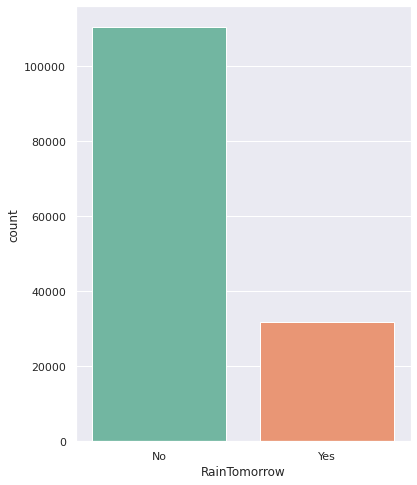

In [163]:
##visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set2")
plt.show()

### Takeaways from Univariate Analysis

1. We have 2 categories of values, `yes` and `No`.
2. We have far more negative(No) values than psitive(Yes) values.
3. `No` appears 77.5% of time, `Yes` appears 22.4% of time.

## Convert Yes/No labels to integers 1/0 to make

In [164]:
df.RainTomorrow = (df.RainTomorrow == 'Yes').astype(int)

In [166]:
df[df['RainTomorrow'] == 1]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,1
15,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142059,2017-02-10,Uluru,24.8,39.8,0.4,NaN,NaN,WNW,65.0,E,...,38.0,24.0,1007.0,1003.6,NaN,NaN,31.5,36.6,No,1
142124,2017-04-17,Uluru,19.3,24.4,0.0,NaN,NaN,W,35.0,ESE,...,28.0,91.0,1015.9,1013.9,8.0,8.0,21.3,18.5,No,1
142125,2017-04-18,Uluru,15.2,21.5,6.8,NaN,NaN,ENE,30.0,NE,...,65.0,65.0,1016.9,1015.3,3.0,8.0,19.0,21.2,Yes,1
142126,2017-04-19,Uluru,17.7,26.9,12.6,NaN,NaN,S,35.0,E,...,93.0,59.0,1018.1,1014.7,7.0,8.0,19.0,26.0,Yes,1


## Biravriate Analysis

Bivariate Analysis requires you to learn about relationships between pairs of variables.

First, segregating the categorical from the dataframe.

In [167]:
cat_vars = ['object']
cat_df = df.select_dtypes(include=cat_vars)
cat_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No


We have 7 categorical columns out of which:
* We have a Date column
* We have 6 categorical variables.
* `RainToday` and `RainTomorrow` are binary categorical features.
    

In [168]:
##counting the missing values in categorical features
cat_df.isnull().sum()

Date               0
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

Next, we need to check for the number of labels each of these variables has. The number of labels a variable has defines its cardinality.

In [169]:
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Date has 3436 labels
Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels


Date column needs to be converted to a DateTime column as it has a high cardinality which is a problem for our ML model.

In [170]:
##formatting Date column to DateTime data type
df['Date'] = pd.to_datetime(df['Date'])

##checking datat info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [171]:
##extracting year from date
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [172]:
##extracting month from date
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [173]:
##extracting day from date
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [174]:
##dropping the original date column
df.drop(['Date'], axis=1, inplace=True)

In [175]:
##checking data head
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


#### Checking out the Correlation Matrix

In [187]:
##creating correlation matrix
corr = df.corr()

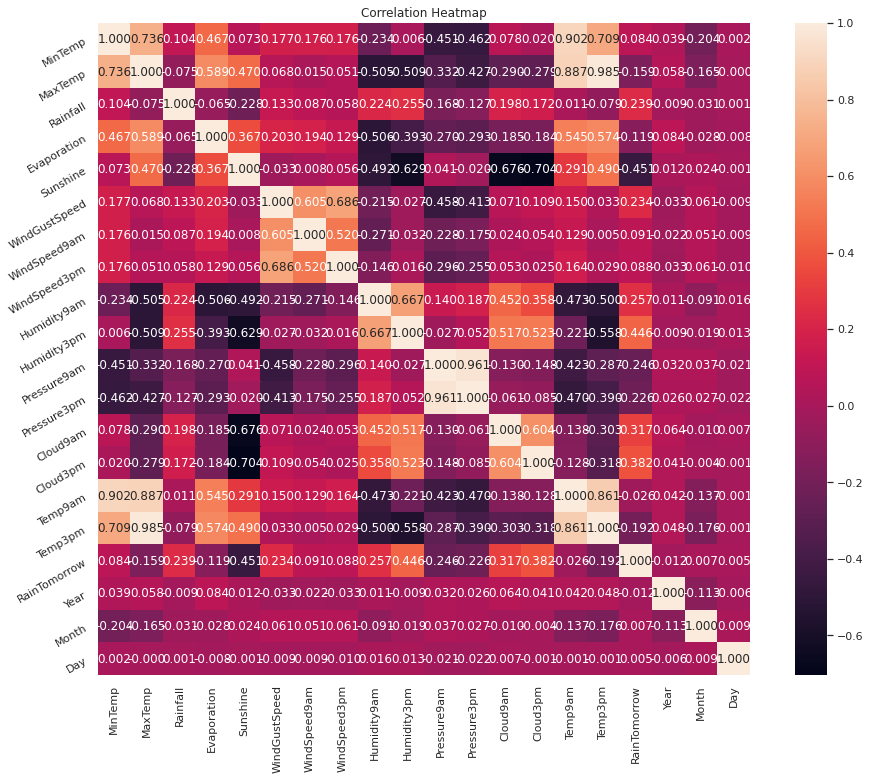

In [188]:
##plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, 
                 annot=True,
                 square=True,
                 fmt='.3f',
                 linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show()

## Missing Values analysis

### Segregating the categorical columns

In [176]:

cat_df = df.select_dtypes(include=cat_vars)
cat_df.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [213]:
cat_df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No


In [177]:
##printing missing value and labels in each column
print(cat_df.isnull().sum(), "=============")
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64 =============
Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels


### Numerical Variables Analysis

In [179]:
##isolating numerical columns in a dataframe
numerics = ['int64', 'float64']
num_df = df.select_dtypes(include=numerics)
num_df.head().T

,0,1,2,3,4
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindSpeed9am,20.0,4.0,19.0,11.0,7.0
WindSpeed3pm,24.0,22.0,26.0,9.0,20.0
Humidity9am,71.0,44.0,38.0,45.0,82.0
Humidity3pm,22.0,25.0,30.0,16.0,33.0


In [180]:
num_df.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

16 numerical columns have missing values

## Outlier Analysis

In [181]:
##summary statistics of all the columns
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


If we compare the mean of each column with the min/max value, we'll notice that `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` might have outliers as there's a considerable difference between average value and max value.

Text(0.5, 0, 'WindSpeed3pm')

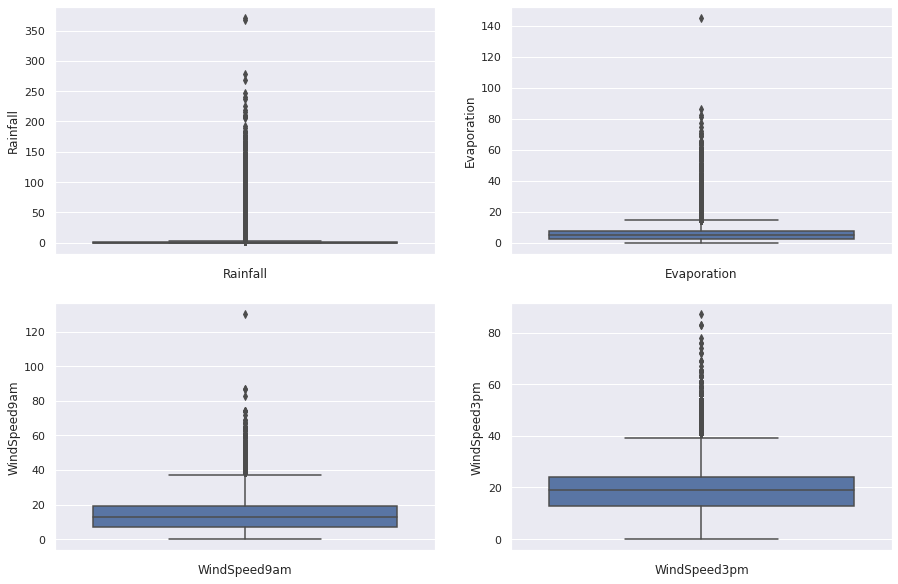

In [182]:

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df["Rainfall"])
ax.set_xlabel("Rainfall")
sns.set(style="darkgrid")

plt.subplot(2, 2, 2)
sns.set(style="darkgrid")
ax = sns.boxplot(y=df["Evaporation"])
ax.set_xlabel("Evaporation")

plt.subplot(2, 2, 3)
sns.set(style="darkgrid")
ax = sns.boxplot(y=df["WindSpeed9am"])
ax.set_xlabel("WindSpeed9am")

plt.subplot(2, 2, 4)
sns.set(style="darkgrid")
ax = sns.boxplot(y=df["WindSpeed3pm"])
ax.set_xlabel("WindSpeed3pm")

In [183]:
##calculating outlier space for Rainfall

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
lf = df.Rainfall.quantile(0.25) - (IQR * 3)
uf = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Outliers for the Rainfall are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )



Outliers for the Rainfall are < -2.4000000000000004 or > 3.2


In [184]:
##calculating outlier space for Evaporation

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
lf = df.Evaporation.quantile(0.25) - (IQR * 3)
uf = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Outliers for the Evaporation are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )


Outliers for the Evaporation are < -11.800000000000002 or > 21.800000000000004


In [185]:
##calculating outlier space for WindSpeed9am

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
lf = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
uf = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('Outliers for the WindSpeed9am are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )


Outliers for the WindSpeed9am are < -29.0 or > 55.0


In [186]:
##calculating outlier space for WindSpeed3pm

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
lf = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
uf = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('Outliers for the WindSpeed3pm are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )


Outliers for the WindSpeed3pm are < -20.0 or > 57.0
